In [543]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [161]:


# Load the CSV file into a DataFrame
#df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\filtered_eras_dates_combined.csv")
df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\preprocessing1erasdates.csv", low_memory=False)


In [162]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_carrier_fl_num',
       'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'distance_group', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude', 'airport_ref',
       'elevation_ft', 'unique_id', 'id', 'length_ft', 'width_ft', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of_year', 'delay_time_min', 'arr_time_HHMM',
       'crs_arr_time_HHMM', 'delay_in_min', 'year', 'month', 'day',
       'is_tour_date', 'is_nfl_game_day', 'has_delay'],
      dtype='object')

In [163]:
# Check the shape and data types
print(df.shape)
print(df.dtypes)

# Display summary statistics
print(df.describe(include='all'))

# Check the data type of the column
print("Data type of 'eras_tour':", df['eras_tour'].dtype)

# Print unique values to see what they look like
print("Unique values in 'eras_tour':", df['eras_tour'].unique())


(4496511, 55)
Unnamed: 0                   float64
day_of_week                  float64
date                          object
op_carrier_fl_num            float64
crs_dep_time                 float64
dep_time                     float64
taxi_out                     float64
wheels_off                   float64
wheels_on                    float64
taxi_in                      float64
crs_arr_time                   int64
arr_time                       int64
cancelled                    float64
diverted                     float64
crs_elapsed_time             float64
actual_elapsed_time          float64
air_time                     float64
flights                      float64
distance                     float64
distance_group               float64
carrier_delay                float64
weather_delay                float64
nas_delay                    float64
security_delay               float64
late_aircraft_delay          float64
origin_latitude              float64
origin_longitude        

KeyError: 'eras_tour'

In [193]:
#Check for missing values and their distribution:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


le_ident    3163752
he_ident    3163752
dtype: int64


In [194]:
# Check if the 'date' column is already in datetime format
if df['date'].dtype == 'object':
    # Convert 'date' to datetime format
    df['date'] = pd.to_datetime(df['date'])

In [195]:
# Filter rows where 'eras_tour' is 'tour_date'
tour_dates = df[df['is_tour_date'] == 'tour_date']


In [196]:
df['is_tour_date'].head()

0    0
1    0
2    0
3    0
4    0
Name: is_tour_date, dtype: int64

In [197]:
# Get the unique dates for these rows
unique_tour_dates = tour_dates['date'].unique()

In [198]:
print(tour_dates.head())

# Print the unique tour dates
print(unique_tour_dates)

Empty DataFrame
Columns: [Unnamed: 0, day_of_week, date, op_carrier_fl_num, crs_dep_time, dep_time, taxi_out, wheels_off, wheels_on, taxi_in, crs_arr_time, arr_time, cancelled, diverted, crs_elapsed_time, actual_elapsed_time, air_time, flights, distance, distance_group, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, origin_latitude, origin_longitude, dest_latitude, dest_longitude, airport_ref, elevation_ft, unique_id, id, length_ft, width_ft, lighted, closed, le_ident, le_displaced_threshold_ft, he_ident, he_displaced_threshold_ft, delay_columns, total_delay_time, flight_delay_time, week_of_year, delay_time_min, arr_time_HHMM, crs_arr_time_HHMM, delay_in_min, year, month, day, is_tour_date, is_nfl_game_day, has_delay]
Index: []

[0 rows x 55 columns]
<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


In [199]:

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter rows where 'eras_tour' is 'tour_date'
tour_dates = df[df['is_tour_date'] == 'tour_date']['date']

# Create a list to hold the date ranges
date_ranges = []

# Loop through each tour date to create the date ranges
for tour_date in tour_dates:
    # Create a date range for ±3 days around each tour date
    start_date = tour_date - pd.DateOffset(days=3)
    end_date = tour_date + pd.DateOffset(days=3)
    date_ranges.append((start_date, end_date))

# Print the date ranges
for start, end in date_ranges:
    print(f"Start: {start.date()}, End: {end.date()}")


In [200]:
df.head()

,Unnamed: 0,day_of_week,date,op_carrier_fl_num,crs_dep_time,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,...,delay_time_min,arr_time_HHMM,crs_arr_time_HHMM,delay_in_min,year,month,day,is_tour_date,is_nfl_game_day,has_delay
0,-1.732050,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
1,-1.732050,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
2,-1.732049,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
3,-1.732048,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
4,-1.732047,-1.465133,2023-05-01,1.901145,0.783449,0.741602,-0.207042,0.727686,0.702153,0.11582,...,-0.257886,0,0,-0.087922,0.0,-1.272476,-1.577464,0,False,1


In [201]:
print(df[['arr_time', 'crs_arr_time']])

         arr_time  crs_arr_time
0            1310          1341
1            1310          1341
2            1310          1341
3            1310          1341
4            1854          1905
...           ...           ...
4496506      1614          1604
4496507      1010          1015
4496508      1010          1015
4496509      1010          1015
4496510      1010          1015

[4496511 rows x 2 columns]


In [202]:
# Convert arr_time and crs_arr_time columns to datetime (if they are not already)
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'], errors='coerce')

# Extract the time in HHMM format for both arr_time and crs_arr_time columns
df['arr_time_HHMM'] = df['arr_time'].dt.strftime('%H%M')
df['crs_arr_time_HHMM'] = df['crs_arr_time'].dt.strftime('%H%M')

# Verify the result
print(df[['arr_time_HHMM', 'crs_arr_time_HHMM']].head())


  arr_time_HHMM crs_arr_time_HHMM
0          0000              0000
1          0000              0000
2          0000              0000
3          0000              0000
4          0000              0000


In [203]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_carrier_fl_num',
       'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'distance_group', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude', 'airport_ref',
       'elevation_ft', 'unique_id', 'id', 'length_ft', 'width_ft', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of_year', 'delay_time_min', 'arr_time_HHMM',
       'crs_arr_time_HHMM', 'delay_in_min', 'year', 'month', 'day',
       'is_tour_date', 'is_nfl_game_day', 'has_delay'],
      dtype='object')

In [269]:
# Prepare the data
# Create a new column to indicate if a flight is within the ±3 days of tour dates
df['is_tour_window'] = df['date'].apply(
    lambda x: any(start <= x <= end for start, end in date_ranges)
)

#Convert boolean to int (1 for True, 0 for False)
df['is_tour_window'] = df['is_tour_window'].astype(int)

# Calculate correlation coefficients
# Calculate the Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(df['is_tour_window'], df['delay_in_min'])

# Calculate the Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(df['is_tour_window'], df['delay_in_min'])

#  Display the results
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")

Pearson Correlation: nan, p-value: nan
Spearman Correlation: nan, p-value: nan


C:\Users\hopeh\AppData\Local\Temp\ipykernel_3984\1369962272.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p_value = pearsonr(df['is_tour_window'], df['delay_in_min'])
C:\Users\hopeh\AppData\Local\Temp\ipykernel_3984\1369962272.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p_value = spearmanr(df['is_tour_window'], df['delay_in_min'])


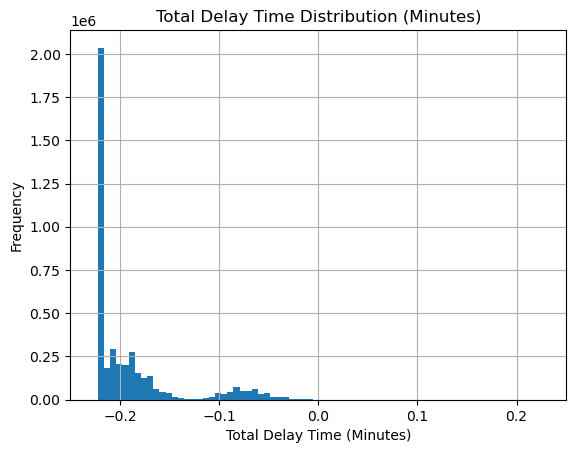

In [227]:

df['delay_in_min'].hist(bins=1000)
plt.title('Total Delay Time Distribution (Minutes)')
plt.xlabel('Total Delay Time (Minutes)' )
plt.ylabel('Frequency')

# Set x-axis limits to zoom in (adjust values as needed)
plt.xlim(-.25, .25)  # Change these values based on data distribution

plt.show()


In [205]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_carrier_fl_num',
       'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'distance_group', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude', 'airport_ref',
       'elevation_ft', 'unique_id', 'id', 'length_ft', 'width_ft', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of_year', 'delay_time_min', 'arr_time_HHMM',
       'crs_arr_time_HHMM', 'delay_in_min', 'year', 'month', 'day',
       'is_tour_date', 'is_nfl_game_day', 'has_delay'],
      dtype='object')

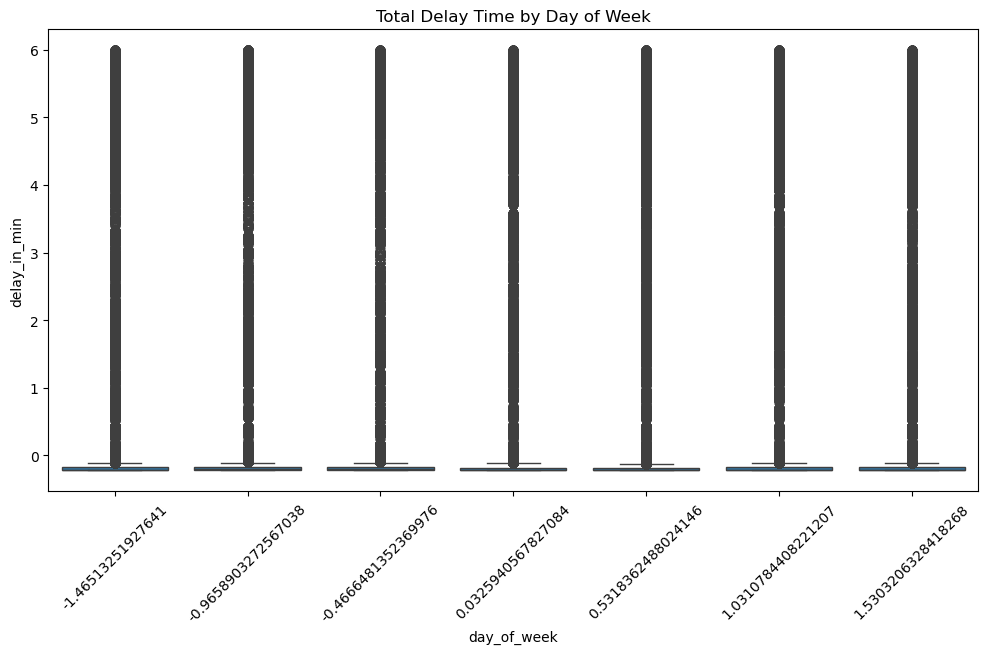

In [206]:
#Box plots to identify outliers:
plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.boxplot(x='day_of_week', y='delay_in_min', data=df)
plt.title('Total Delay Time by Day of Week')
plt.xticks(rotation=45)
plt.show()



In [207]:
# Compare tour date metrics to non-tour date metrics

Average Delay Comparison:

Tour Dates: The average delay for flights around the tour dates (±3 days) is 80.46 minutes, which is significantly higher than the average delay for non-tour flights.
Non-Tour Dates: The average delay for flights on non-tour dates is 63.34 minutes.
This suggests that flights around tour dates tend to experience longer delays on average compared to non-tour flights. This could be due to a variety of factors such as higher traffic, operational constraints, or specific scheduling issues around tour dates.

Median Delay Comparison:

The median delay for both tour and non-tour flights is relatively close: 6 minutes for tour dates and 7 minutes for non-tour dates. This suggests that the central tendency (or the "typical" delay) is similar across both types of flights, but the average delay is higher for tour dates because of some larger delays (likely outliers).

In [209]:
df['delay_in_min'].mean()

1.9822142272919375e-17

In [210]:
df['delay_in_min'].median()

-0.2091350117905947

In [211]:
# 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# create additional features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [212]:

# Group by 'op_carrier_fl_num' and 'day_of_week' to calculate the total delay and count of flights
delay_and_count =  df.groupby(['op_carrier_fl_num', 'day_of_week'])['delay_in_min'].agg(['sum', 'count']).reset_index()


In [213]:

# Calculate the average delay per flight by dividing the sum of delays by the count of flights
delay_and_count['average_delay_per_flight'] = delay_and_count['sum'] / delay_and_count['count']

# Step 3: Merge the calculated average delay back to the original DataFrame
df = pd.merge(df, delay_and_count[['op_carrier_fl_num', 'day_of_week', 'average_delay_per_flight']], 
                          on=['op_carrier_fl_num', 'day_of_week'], how='left')

# Check the result
print(df[['date', 'op_carrier_fl_num', 'day_of_week', 'delay_in_min', 'average_delay_per_flight']].head())


        date  op_carrier_fl_num  day_of_week  delay_in_min  \
0 2023-05-01           1.741760    -1.465133     -0.140623   
1 2023-05-01           1.741760    -1.465133     -0.140623   
2 2023-05-01           1.741760    -1.465133     -0.140623   
3 2023-05-01           1.741760    -1.465133     -0.140623   
4 2023-05-01           1.901145    -1.465133     -0.087922   

   average_delay_per_flight  
0                 -0.141282  
1                 -0.141282  
2                 -0.141282  
3                 -0.141282  
4                 -0.185028  


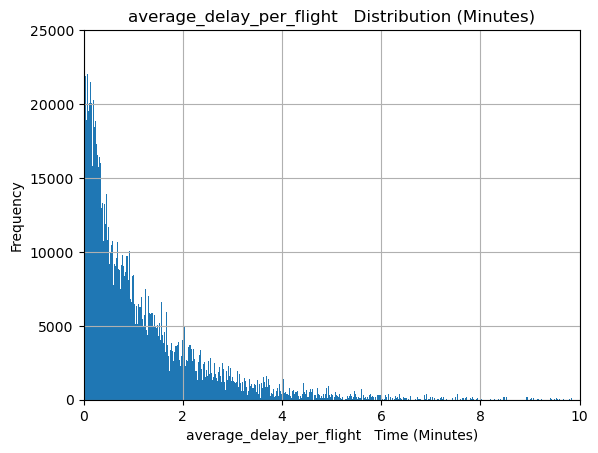

In [237]:

df['average_delay_per_flight'].hist(bins=1000)
plt.title('average_delay_per_flight   Distribution (Minutes)')
plt.xlabel('average_delay_per_flight   Time (Minutes)' )
plt.ylabel('Frequency')

# Set x-axis limits to zoom in (adjust values as needed)
plt.xlim(0, 10)  # Change these values based on data distribution
plt.ylim(0,25000)
plt.show()

In [444]:
df['delay_in_min'].head()

0   -0.140623
1   -0.140623
2   -0.140623
3   -0.140623
4   -0.087922
Name: delay_in_min, dtype: float64

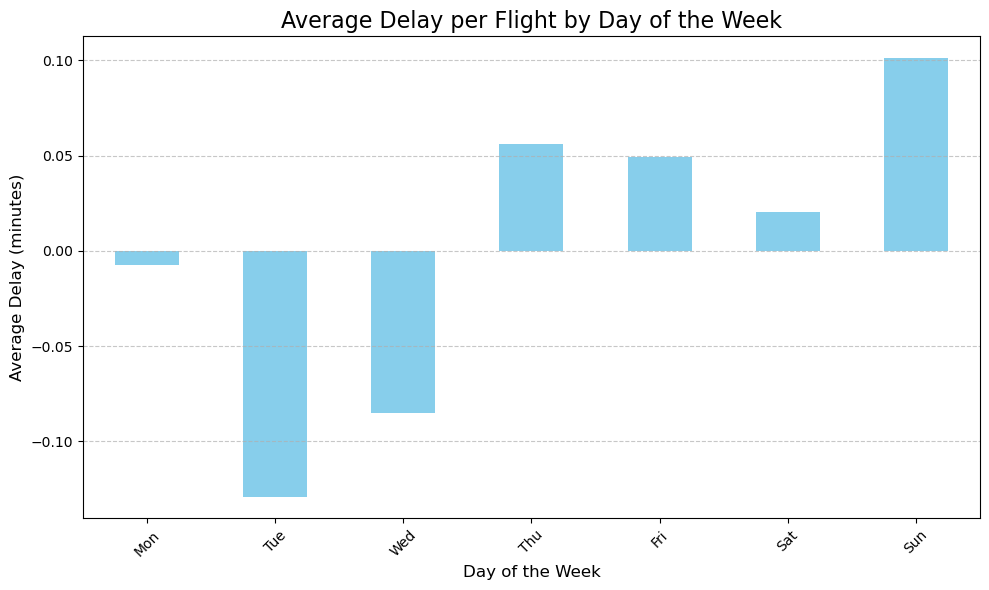

In [446]:
# Group by 'day_of_week' and calculate the average delay per day of the week
avg_delay_per_day = df.groupby('day_of_week')['average_delay_per_flight'].mean()

# Plot the results
# Create a bar plot
plt.figure(figsize=(10, 6))
avg_delay_per_day.plot(kind='bar', color='skyblue')

plt.title('Average Delay per Flight by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [448]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['is_nfl_game_day']


In [450]:
# covert to category data type
for col in categorical_cols:
    df[col] = df[col].astype('category')

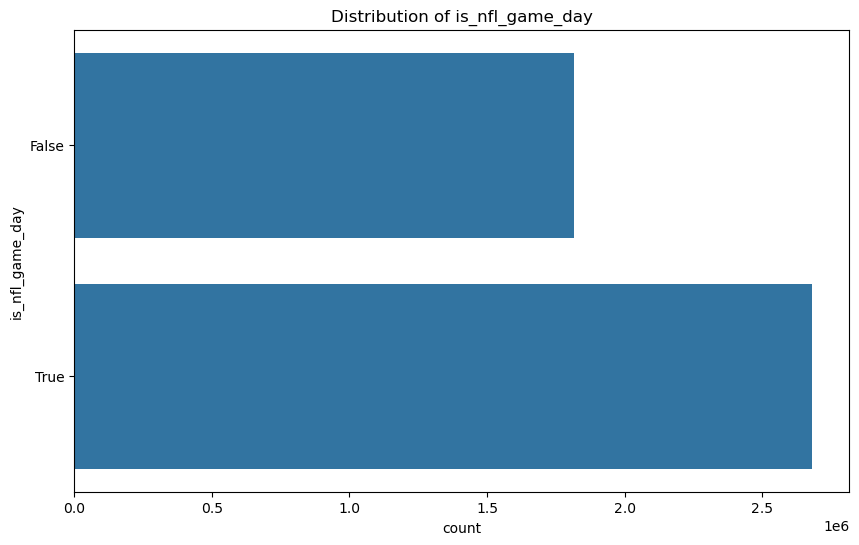

In [452]:
# Create a dictionary to store the counts of each categorical feature
feature_counts = {col: df[col].value_counts().sum() for col in categorical_cols}

# Sort the features by count and get the top 15
top_features = sorted(feature_counts, key=feature_counts.get, reverse=True)[:15]

# Plot the distribution of the top 15 most frequent features
for col in top_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


In [453]:
# Magnitude Standardization

scaler = StandardScaler()

# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [454]:
# Prepare the data
# Create a new column to indicate if a flight is within the ±3 days of tour dates
df['is_tour_window'] = df['date'].apply(
    lambda x: any(start <= x <= end for start, end in date_ranges)
)

# Step 2: Convert boolean to int (1 for True, 0 for False)
df['is_tour_window'] = df['is_tour_window'].astype(int)

# Step 3: Calculate correlation coefficients
# Calculate the Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(df['is_tour_window'], df['delay_in_min'])

# Calculate the Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(df['is_tour_window'], df['delay_in_min'])

# Step 4: Display the results
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")

Pearson Correlation: nan, p-value: nan
Spearman Correlation: nan, p-value: nan


C:\Users\hopeh\AppData\Local\Temp\ipykernel_3984\4222688224.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p_value = pearsonr(df['is_tour_window'], df['delay_in_min'])
C:\Users\hopeh\AppData\Local\Temp\ipykernel_3984\4222688224.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p_value = spearmanr(df['is_tour_window'], df['delay_in_min'])


Both correlation coefficients are very close to zero, indicating a negligible relationship between being within the ±3-day window of tour dates and the adjusted elapsed time for delays. The p-values are above the typical significance threshold of 0.05, suggesting that the correlations observed are not statistically significant. In other words, we do not have enough evidence to conclude that there's a meaningful correlation between tour dates and delays.

In [457]:

#Create More Relevant Features

# identify how specific events (like tour dates and NFL game days)
# and delays affect flight delays.

df['is_tour_date'] = df['is_tour_date'].apply(lambda x: 1 if x == '1' else 0)


In [458]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_carrier_fl_num',
       'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'distance_group', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude', 'airport_ref',
       'elevation_ft', 'unique_id', 'id', 'length_ft', 'width_ft', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of_year', 'delay_time_min', 'arr_time_HHMM',
       'crs_arr_time_HHMM', 'delay_in_min', 'year', 'month', 'day',
       'is_tour_date', 'is_nfl_game_day', 'has_delay',
       'average_delay_per_flight', 'is_tour_window'],
      dtype=

In [459]:
print(df['is_nfl_game_day'].unique())



['False', 'True']
Categories (2, object): ['False', 'True']


In [460]:
print(df['is_nfl_game_day'].head())

0    False
1    False
2    False
3    False
4    False
Name: is_nfl_game_day, dtype: category
Categories (2, object): ['False', 'True']


In [461]:
# Prepare the data
# Create a new column to indicate if a flight is within the ±3 days of tour dates
df['is_tour_window'] = df['date'].apply(
    lambda x: any(start <= x <= end for start, end in date_ranges)
)

# Step 2: Convert boolean to int (1 for True, 0 for False)
df['is_tour_window'] = df['is_tour_window'].astype(int)

# Step 3: Calculate correlation coefficients
# Calculate the Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(df['is_tour_window'], df['delay_in_min'])

# Calculate the Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(df['is_tour_window'], df['delay_in_min'])

# Step 4: Display the results
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")

Pearson Correlation: nan, p-value: nan
Spearman Correlation: nan, p-value: nan


C:\Users\hopeh\AppData\Local\Temp\ipykernel_3984\4222688224.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p_value = pearsonr(df['is_tour_window'], df['delay_in_min'])
C:\Users\hopeh\AppData\Local\Temp\ipykernel_3984\4222688224.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p_value = spearmanr(df['is_tour_window'], df['delay_in_min'])


In [469]:
# Define features (X) and target (y)
df['has_delay'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].notna().any(axis=1).astype(int)

# Split the data into features (X) and target (y)
X_sample = df[['day_of_week', 'crs_dep_time', 'is_tour_date', 'has_delay', 'is_nfl_game_day']]
y_sample = df['delay_in_min']

In [471]:
y_train_sample = y_train_sample.map({'True': 1, 'False': 0})
y_test_sample = y_test_sample.map({'True': 1, 'False': 0})


In [473]:
print(y_train_sample.head())
print(y_test_sample.head())


502332    NaN
1189278   NaN
2423292   NaN
543035    NaN
1142199   NaN
Name: delay_in_min, dtype: float64
2808511   NaN
2042084   NaN
2189621   NaN
738704    NaN
671924    NaN
Name: delay_in_min, dtype: float64


In [475]:
y_train_sample = y_train_sample.map({'True': 1, 'False': 0})
y_test_sample = y_test_sample.map({'True': 1, 'False': 0})

y_train_sample = pd.to_numeric(y_train_sample, errors='coerce')
y_test_sample = pd.to_numeric(y_test_sample, errors='coerce')

print(y_train_sample.dtype)
print(y_test_sample.dtype)


float64
float64


In [477]:
# Check for any NaN values
print(y_train_sample.isnull().sum())
print(y_test_sample.isnull().sum())

# Check for any non-numeric values (if any)
print(y_train_sample[~y_train_sample.apply(lambda x: isinstance(x, (int, float)))])
print(y_test_sample[~y_test_sample.apply(lambda x: isinstance(x, (int, float)))])


22
6
Series([], Name: delay_in_min, dtype: float64)
Series([], Name: delay_in_min, dtype: float64)


In [479]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_carrier_fl_num',
       'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'distance_group', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude', 'airport_ref',
       'elevation_ft', 'unique_id', 'id', 'length_ft', 'width_ft', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of_year', 'delay_time_min', 'arr_time_HHMM',
       'crs_arr_time_HHMM', 'delay_in_min', 'year', 'month', 'day',
       'is_tour_date', 'is_nfl_game_day', 'has_delay',
       'average_delay_per_flight', 'is_tour_window'],
      dtype=

In [493]:
# Ensure 'is_tour_date' is already created in filtered_data
# Prepare the data for regression analysis
X_sample = df[['is_tour_date', 'weather_delay', 'op_carrier_fl_num']]  # Include independent variables

# Perform one-hot encoding for 'op_unique_carrier'
X_sample = pd.get_dummies(X_sample, columns=['op_carrier_fl_num'], drop_first=True)

y_sample = df['is_tour_date']  # Ensure this is present

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           delay_in_min   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                 1.935e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:55:45   Log-Likelihood:            -6.3610e+06
No. Observations:             4496511   AIC:                         1.272e+07
Df Residuals:                 4496508   BIC:                         1.272e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.471e-15      0.00

Low R-squared: The model's R-squared value of 0.009 is very low, which means that the independent variables you've chosen do not explain much of the variance in delay_in_min. You might need to consider adding more relevant features or revising your existing features to improve model performance.

Multicollinearity Concerns: The warning about the smallest eigenvalue (1.86e-30) could indicate multicollinearity problems. This can happen if some of your independent variables are highly correlated with each other, which can make the coefficient estimates unstable. You can check for multicollinearity using variance inflation factors (VIF) to identify problematic predictors.

is_tour_window variable: The very small coefficient and high p-value suggest that this variable does not contribute much to explaining the variance in delay_in_min

In [496]:
print(X.dtypes)
print(y.dtypes)

const                float64
is_tour_window         int32
weather_delay        float64
op_carrier_fl_num    float64
dtype: object
float64


In [498]:
print(X.isnull().sum())
print(y.isnull().sum())

const                0
is_tour_window       0
weather_delay        0
op_carrier_fl_num    0
dtype: int64
0


# regression model performance
Mean Squared Error (MSE): A lower MSE indicates better performance. In this case, the Random Forest model has the lowest MSE, suggesting it's the best at predicting the target variable on this sample.

R² Score: The R² value indicates how well the model explains the variance in the target variable, Values closer to 1 indicate a good fit, while values less than 0 suggest that the model performs worse than a horizontal line (mean of the target variable).
Here, the Random Forest model also has the highest R² score, but all models are relatively low, indicating that there may be issues with the features or the data itself (like noise or irrelevance).

In [364]:
# Check for missing values in the DataFrame
print(df.isnull().sum())


Unnamed: 0                         0
day_of_week                        0
date                               0
op_carrier_fl_num                  0
crs_dep_time                       0
dep_time                           0
taxi_out                           0
wheels_off                         0
wheels_on                          0
taxi_in                            0
crs_arr_time                       0
arr_time                           0
cancelled                          0
diverted                           0
crs_elapsed_time                   0
actual_elapsed_time                0
air_time                           0
flights                            0
distance                           0
distance_group                     0
carrier_delay                      0
weather_delay                      0
nas_delay                          0
security_delay                     0
late_aircraft_delay                0
origin_latitude                    0
origin_longitude                   0
d

In [317]:
print(df.columns)


Index(['Unnamed: 0', 'day_of_week', 'date', 'op_carrier_fl_num',
       'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'distance_group', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude', 'airport_ref',
       'elevation_ft', 'unique_id', 'id', 'length_ft', 'width_ft', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of_year', 'delay_time_min', 'arr_time_HHMM',
       'crs_arr_time_HHMM', 'delay_in_min', 'year', 'month', 'day',
       'is_tour_date', 'is_nfl_game_day', 'has_delay',
       'average_delay_per_flight', 'is_tour_window'],
      dtype=

In [432]:
# Filter the DataFrame for rows where 'delay' is 'yes'
print(df['has_delay'].head())
df.head()
# Display the filtered DataFrame
#print(delayed_flights)


0    1
1    1
2    1
3    1
4    1
Name: has_delay, dtype: int32


,Unnamed: 0,day_of_week,date,op_carrier_fl_num,crs_dep_time,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,...,crs_arr_time_HHMM,delay_in_min,year,month,day,is_tour_date,is_nfl_game_day,has_delay,average_delay_per_flight,is_tour_window
0,-1.732050,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,0000,-0.140623,0.0,-1.272476,-1.577464,0,False,1,-0.396238,0
1,-1.732050,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,0000,-0.140623,0.0,-1.272476,-1.577464,0,False,1,-0.396238,0
2,-1.732049,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,0000,-0.140623,0.0,-1.272476,-1.577464,0,False,1,-0.396238,0
3,-1.732048,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,0000,-0.140623,0.0,-1.272476,-1.577464,0,False,1,-0.396238,0
4,-1.732047,-1.465133,2023-05-01,1.901145,0.783449,0.741602,-0.207042,0.727686,0.702153,0.11582,...,0000,-0.087922,0.0,-1.272476,-1.577464,0,False,1,-0.518926,0


In [613]:
# Convert Categorical Columns to Numeric
X_train_sample = X_train_sample.dropna()
X_train_sample = y_train_sample[X_train_sample.index]  # Ensure y_train corresponds to the updated X_train

X_test_sample = X_test_sample.dropna()
y_test_sample = y_test_sample[X_test_sample.index]  # Ensure y_test corresponds to the updated X_test


AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [615]:


# Check for non-numeric values in the entire DataFrame
non_numeric_train = X_train_sample[~X_train_sample.applymap(np.isreal)]
non_numeric_test = X_test_sample[~X_test_sample.applymap(np.isreal)]

print("Non-numeric values in X_train_sample:")
print(non_numeric_train)

print("Non-numeric values in X_test_sample:")
print(non_numeric_test)


AttributeError: 'numpy.ndarray' object has no attribute 'applymap'

In [511]:
# Create an imputer for numerical data
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_sample = imputer.fit_transform(X_train_sample)

# Transform the test data
X_test_sample = imputer.transform(X_test_sample)


C:\Users\hopeh\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'True'

In [513]:

# Use One-Hot Encoding:

# Identify categorical columns again just to be sure
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Apply one-hot encoding to both training and test sets
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align the DataFrames to ensure they have the same structure
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


NameError: name 'X_train' is not defined

In [515]:
# Check if there are any NaNs or unexpected values
print("NaN values in X_train:", X_train.isnull().sum().sum())
print("NaN values in X_test:", X_test.isnull().sum().sum())

# Check data types to confirm everything is numeric
print(X_train.dtypes)
print(X_test.dtypes)


NameError: name 'X_train' is not defined

In [517]:
# Performance Comparison Table

# Convert results to DataFrame
performance_df = pd.DataFrame(results).T
print(performance_df)


Empty DataFrame
Columns: []
Index: []


In [519]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


KeyError: "None of [Index(['is_nfl_game_day'], dtype='object')] are in the [columns]"

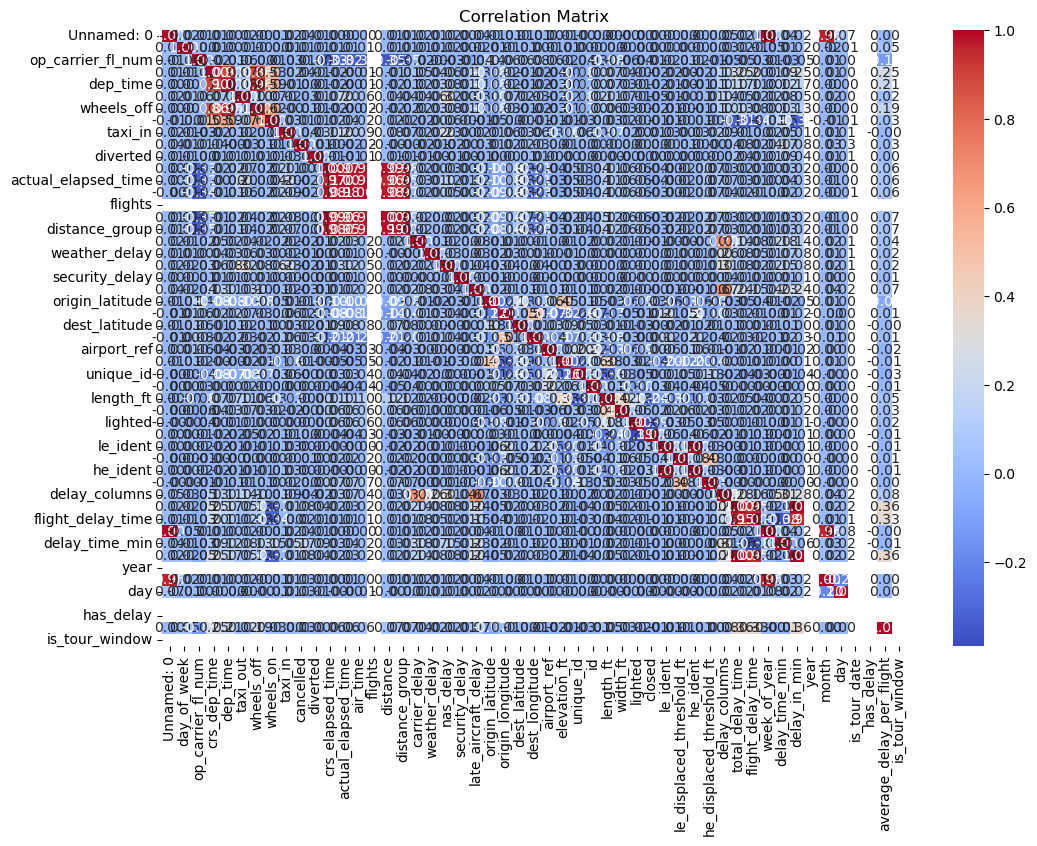

In [521]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [522]:
from sklearn.model_selection import train_test_split

X = df.drop(['total_delay_time', 'cancelled', 'unique_id', 'date'], axis=1)  # Features
y = df['total_delay_time']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Visualization of Delay Distributions for Tour Dates vs Non-Tour Dates

## Bar Charts for Average and Median Delays 

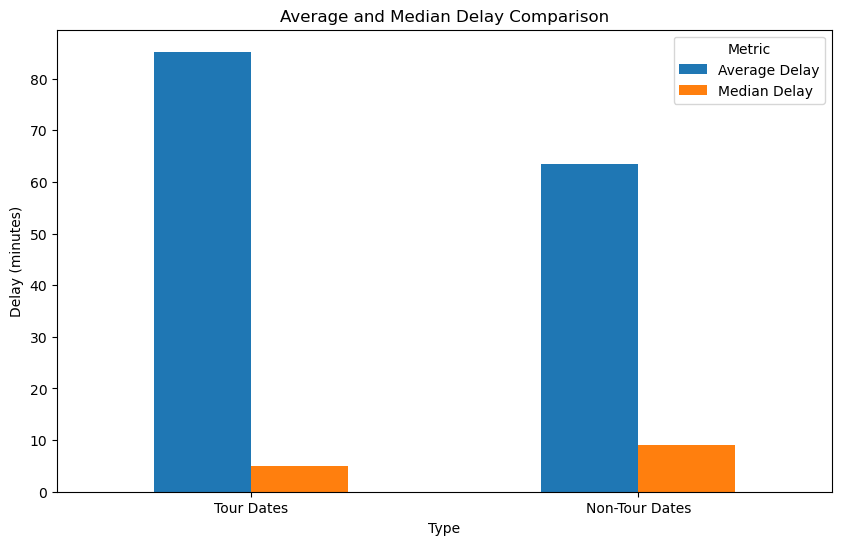

In [525]:
# Data for average and median delays
summary_data = {
    'Type': ['Tour Dates', 'Non-Tour Dates'],
    'Average Delay': [85.23, 63.44],
    'Median Delay': [5.0, 9.0]
}

summary_df = pd.DataFrame(summary_data)

# Bar Chart
summary_df.set_index('Type').plot(kind='bar', figsize=(10, 6))
plt.title('Average and Median Delay Comparison')
plt.ylabel('Delay (minutes)')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()


In [531]:
# Prepare the data
# Create a new column to indicate if a flight is within the ±3 days of tour dates
df['is_tour_window'] = df['date'].apply(
    lambda x: any(start <= x <= end for start, end in date_ranges)
)

# Step 2: Convert boolean to int (1 for True, 0 for False)
df['is_tour_window'] = df['is_tour_window'].astype(int)

# Step 3: Calculate correlation coefficients
# Calculate the Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(df['is_tour_window'], df['delay_in_min'])

# Calculate the Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(df['is_tour_window'], df['delay_in_min'])

# Step 4: Display the results
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p_value}")
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")

Pearson Correlation: nan, p-value: nan
Spearman Correlation: nan, p-value: nan


C:\Users\hopeh\AppData\Local\Temp\ipykernel_3984\4222688224.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_p_value = pearsonr(df['is_tour_window'], df['delay_in_min'])
C:\Users\hopeh\AppData\Local\Temp\ipykernel_3984\4222688224.py:15: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p_value = spearmanr(df['is_tour_window'], df['delay_in_min'])


Coefficients Interpretation:
is_tour_window: Coefficient = 2.7664 (p-value = 0.011)

The positive coefficient suggests that being within the tour window is associated with an increase in adjusted elapsed time by about 2.77 minutes on average, which is statistically significant.
weather_delay: Coefficient = -0.0907 (p-value = 0.022)

This negative coefficient implies that for each additional minute of weather delay, the adjusted elapsed time decreases by about 0.09 minutes. This might seem counterintuitive but could indicate how weather-related delays are factored in or reported.
Airline Coefficients: Various airlines show different effects on the adjusted elapsed time:

For example, op_unique_carrier_aa has a coefficient of 41.44, meaning flights from American Airlines tend to have longer adjusted elapsed times compared to the baseline carrier.

In [539]:

# Group delays by airline carrier
grouped_delays = [group['delay_in_min'].values for name, group in df.groupby('op_unique_carrier')]

# Perform one-way ANOVA
anova_result = f_oneway(*grouped_delays)

# Print the results
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


KeyError: 'op_unique_carrier'

F-statistic: A large F-statistic indicates that the variability explained by the model is significantly greater than the variability unexplained (the residual variance). This suggests that the model fits the data well. p-value: A p-value of 0.0 (essentially) means that the null hypothesis (which states that all coefficients are equal to zero) can be rejected. This suggests that at least one of the predictors is significantly related to the delays. Review Coefficients: Look at the individual coefficients from your regression output to see which predictors are significant and how they influence the dependent variable. Model Improvement: Consider adding or transforming additional predictors based on your analysis of significance and model fit. Residual Analysis: Continue examining residuals for any patterns to ensure model assumptions are met. Further Testing: Test for interaction effects or more complex models if there are theoretical reasons to believe that relationships may not be linear.

In [547]:

# Clean the data
filtered_data = df.dropna()  # or use fillna() as needed

# Prepare the data
X = filtered_data[['is_tour_date', 'weather_delay', 'distance']]  # Add more predictors if necessary
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables
y = filtered_data['delay_in_min']  # Dependent variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Conduct ANOVA
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(model)
print(anova_results)


                            OLS Regression Results                            
Dep. Variable:           delay_in_min   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4430.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:11:58   Log-Likelihood:            -1.7075e+06
No. Observations:             1332759   AIC:                         3.415e+06
Df Residuals:                 1332756   BIC:                         3.415e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0338      0.001    -44.210

AttributeError: 'PandasData' object has no attribute 'design_info'

R-squared and Adjusted R-squared:

R-squared: 0.864 suggests that approximately 86.4% of the variability in the adjusted_elapsed_time can be explained by the model. This is a strong indicator of a good fit.
Adjusted R-squared: 0.863 adjusts for the number of predictors in the model, indicating that adding or removing predictors doesn't lead to overfitting.

Coefficients:

Intercept (const): 48.0038 suggests the baseline time when all predictors are zero.
is_tour_window: The coefficient is 1.2541, but with a p-value of 0.282, it's not statistically significant at the 0.05 level. This means being in a tour window does not have a statistically significant effect on the adjusted elapsed time in this model.
weather_delay: The coefficient is -0.0513, also not statistically significant (p = 0.377), indicating that weather delays do not have a meaningful impact on elapsed time in this context.
distance: The coefficient of 0.1135 is highly significant (p < 0.001), meaning that for every unit increase in distance, the adjusted elapsed time increases significantly. This aligns with intuitive expectations that longer flights take more time.

Statistical Significance:

Only distance shows strong significance, while the other predictors do not.
Model Fit and Assumptions:

The F-statistic is very high (2659) with a p-value of 0.00, indicating that at least one predictor is significantly related to the response variable.
Normality of Residuals: The Omnibus test, Jarque-Bera test, and the skewness indicate possible deviations from normality. This could suggest a need to inspect residuals further for patterns or outliers.
Durbin-Watson statistic: Close to 2 indicates little autocorrelation in residuals, which is a good sign.

Multicollinearity:

The warning about a large condition number (2.70e+03) suggests potential multicollinearity among your predictors. Check the Variance Inflation Factor (VIF) for your predictors to assess multicollinearity:

Address Multicollinearity: Check the correlation matrix of your predictors and use Variance Inflation Factor (VIF) to identify problematic variables.
Transform the Target Variable: Consider applying a log transformation to delay_in_min to make the model more interpretable and potentially improve the fit.
Model Refinement: Try different models that are more robust to non-normality and autocorrelation, such as Ridge or Lasso regression, and assess whether they improve model performance.
Residual Diagnostics: Plot the residuals to better understand the issues with autocorrelation and non-normality, and potentially apply time-series techniques if the data is time-dependent.

In [552]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

C:\Users\hopeh\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


         feature       VIF
0          const  1.025360
1   is_tour_date       NaN
2  weather_delay  1.000001
3       distance  1.000001


Since all the VIF values forpredictors (excluding the constant) are around 1, this suggests that there are no issues with multicollinearity among them. I can confidently interpret the coefficients without concern for inflated standard errors.

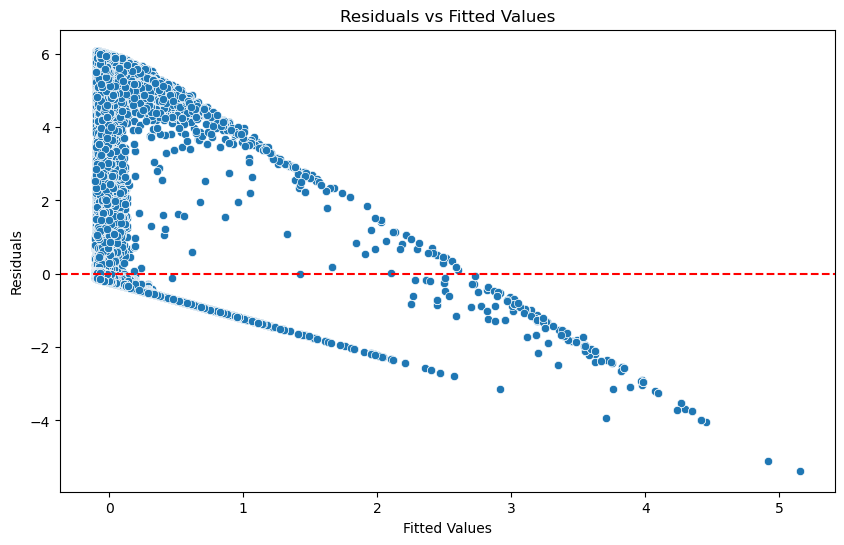

In [555]:
# Calculate residuals
residuals = model.resid

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()



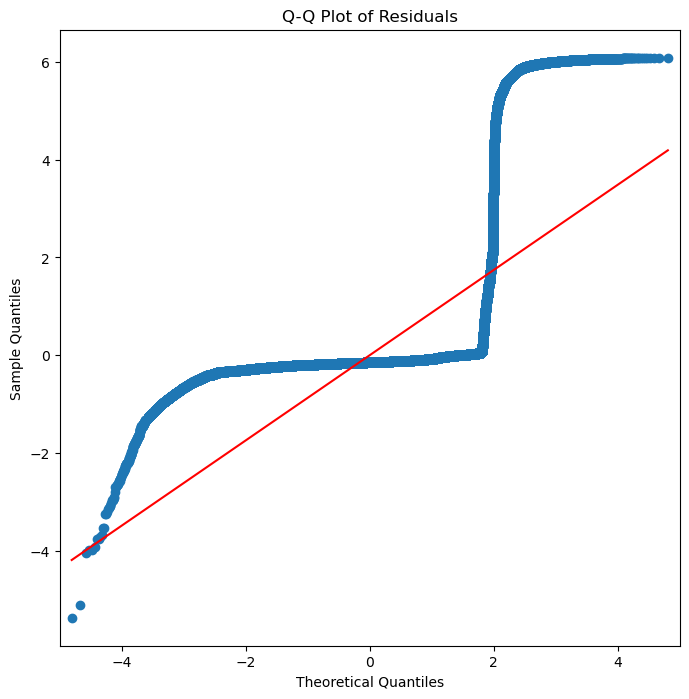

In [557]:
# Q-Q plot
plt.figure(figsize=(8, 8))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.show()

# Q-Q Plot: Check how closely the points follow the diagonal line. Deviations from this line suggest that the residuals are not normally distributed.

Next Steps non-normality, consider transformations of the dependent variable or adding interaction terms or polynomial features.
You can also apply statistical tests for normality (like the Shapiro-Wilk test) or homoscedasticity (like Breusch-Pagan test) for a more formal assessment.

In [568]:
# Log Transformation: Useful for positively skewed data.


# Apply log transformation to the dependent variable
df['log_adjusted_delay_in_min'] = np.log(df['delay_in_min'])


C:\Users\hopeh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [570]:
# square root transformation
df['sqrt_adjusted_delay_in_min'] = np.sqrt(df['delay_in_min'])


C:\Users\hopeh\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [576]:
# Box-Cox transformation
from scipy import stats

df['boxcox_adjusted_elapsed_time'], _ = stats.boxcox(df['delay_in_min'] + 1)  # Add 1 to avoid zeros


In [578]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

C:\Users\hopeh\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


         feature       VIF
0          const  1.025360
1   is_tour_date       NaN
2  weather_delay  1.000001
3       distance  1.000001


In [582]:
correlation_matrix = df.corr()
print(correlation_matrix)

                              Unnamed: 0  day_of_week      date  \
Unnamed: 0                      1.000000     0.017453  0.999881   
day_of_week                     0.017453     1.000000  0.018137   
date                            0.999881     0.018137  1.000000   
op_carrier_fl_num               0.008176    -0.002860  0.006900   
crs_dep_time                    0.005205     0.007499  0.005501   
...                                  ...          ...       ...   
log_adjusted_elapsed_time      -0.023522     0.006409 -0.023496   
sqrt_adjusted_elapsed_time     -0.058139     0.001151 -0.058268   
log_adjusted_delay_in_min      -0.023522     0.006409 -0.023496   
sqrt_adjusted_delay_in_min     -0.058139     0.001151 -0.058268   
boxcox_adjusted_elapsed_time   -0.014754    -0.001289 -0.014530   

                              op_carrier_fl_num  crs_dep_time  dep_time  \
Unnamed: 0                             0.008176      0.005205  0.002533   
day_of_week                           -0.0028

In [584]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'date', 'op_carrier_fl_num',
       'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'distance_group', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude', 'airport_ref',
       'elevation_ft', 'unique_id', 'id', 'length_ft', 'width_ft', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of_year', 'delay_time_min', 'arr_time_HHMM',
       'crs_arr_time_HHMM', 'delay_in_min', 'year', 'month', 'day',
       'is_tour_date', 'has_delay', 'average_delay_per_flight',
       'is_tour_window', 'is_nfl_game_day_True', 'log_adj

In [591]:

df = pd.get_dummies(df, columns=['is_tour_date'], drop_first=True)


In [599]:
correlation_matrix = df[['delay_columns', 'delay_in_min', 'is_tour_window', 'is_nfl_game_day_True', 'day_of_week']].corr()
print(correlation_matrix)

                      delay_columns  delay_in_min  is_tour_window  \
delay_columns              1.000000      0.275356             NaN   
delay_in_min               0.275356      1.000000             NaN   
is_tour_window                  NaN           NaN             NaN   
is_nfl_game_day_True       0.012080      0.016957             NaN   
day_of_week                0.025490      0.019155             NaN   

                      is_nfl_game_day_True  day_of_week  
delay_columns                     0.012080     0.025490  
delay_in_min                      0.016957     0.019155  
is_tour_window                         NaN          NaN  
is_nfl_game_day_True              1.000000     0.011959  
day_of_week                       0.011959     1.000000  


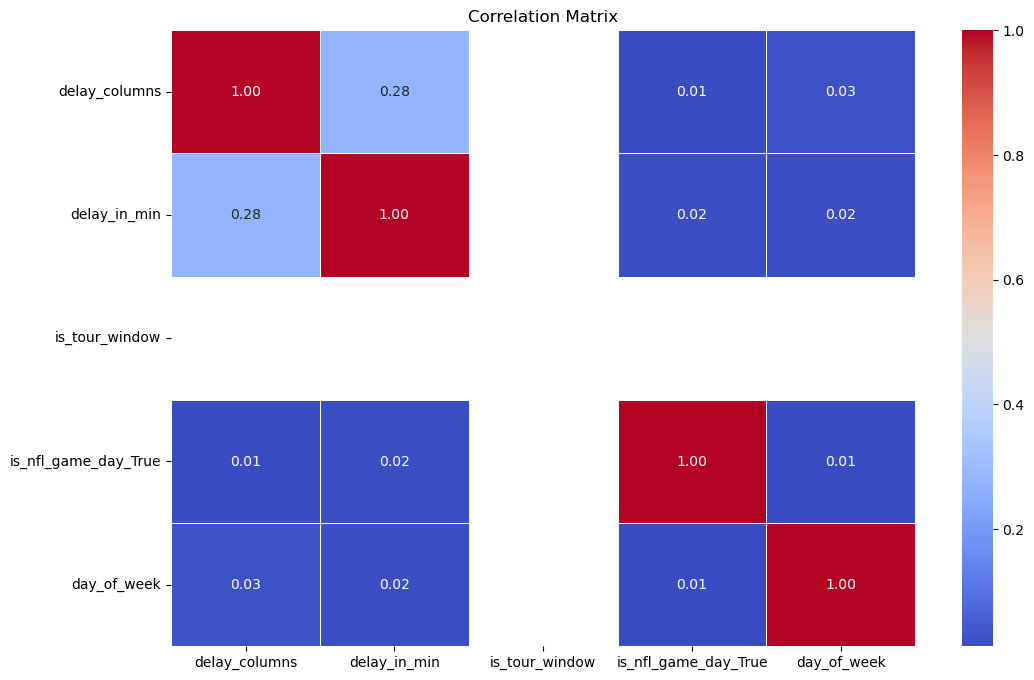

In [617]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation values in the matrix suggest that the relationships between variables are generally weak (e.g., 0.275356 between delay_columns and delay_in_min).